<a href="https://colab.research.google.com/github/alperbozoglu/NBA_DataVisualization/blob/main/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#2012-2013 to 2023-2024 NBA Matches
df = pd.read_csv('nba.csv')

In [4]:
df.head()

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,...,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,...,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,...,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,...,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,...,460,171,52,32,175,205,1920,1553,0.98,0.30


In [5]:
df.tail()

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
8830,2023-24,Playoffs,1641765,198,Olivier-Maxence Prosper,1610612742,DAL,3,9,0,...,3,1,0,0,0,0,0,2,0.0,0.0
8831,2023-24,Playoffs,1631115,198,Orlando Robinson,1610612748,MIA,1,2,0,...,1,1,0,0,0,0,0,1,0.0,0.0
8832,2023-24,Playoffs,203933,198,T.J. Warren,1610612750,MIN,3,11,0,...,3,1,0,0,0,0,0,2,0.0,0.0
8833,2023-24,Playoffs,201152,198,Thaddeus Young,1610612756,PHX,1,4,0,...,0,0,0,0,0,0,0,0,0.0,0.0
8834,2023-24,Playoffs,203648,198,Thanasis Antetokounmpo,1610612749,MIL,2,5,0,...,0,0,1,1,0,1,0,2,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8835 non-null   object 
 1   Season_type  8835 non-null   object 
 2   PLAYER_ID    8835 non-null   int64  
 3   RANK         8835 non-null   int64  
 4   PLAYER       8835 non-null   object 
 5   TEAM_ID      8835 non-null   int64  
 6   TEAM         8835 non-null   object 
 7   GP           8835 non-null   int64  
 8   MIN          8835 non-null   int64  
 9   FGM          8835 non-null   int64  
 10  FGA          8835 non-null   int64  
 11  FG_PCT       8835 non-null   float64
 12  FG3M         8835 non-null   int64  
 13  FG3A         8835 non-null   int64  
 14  FG3_PCT      8835 non-null   float64
 15  FTM          8835 non-null   int64  
 16  FTA          8835 non-null   int64  
 17  FT_PCT       8835 non-null   float64
 18  OREB         8835 non-null   int64  
 19  DREB  

In [7]:
kd = df[df["PLAYER"] == "Kevin Durant"]

In [8]:
#Kevin Durantin
kd.RANK

,RANK
0,1
474,7
677,1
1159,1
1509,148
2064,3
2541,4
2777,25
3242,4
3462,9


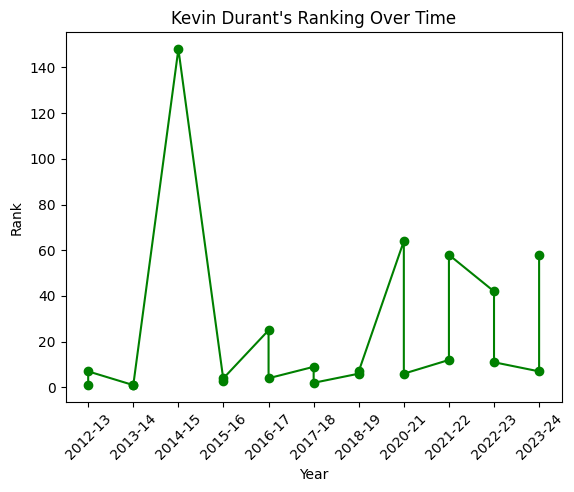

In [22]:
x = kd.year
y = kd.RANK
plt.plot(x,y, marker = 'o', linestyle = '-', color = 'g')
plt.xlabel("Year")
plt.ylabel("Rank")
plt.title("Kevin Durant's Ranking Over Time")
plt.xticks(rotation = 45)
plt.show()


In [36]:
ply_pts = df.groupby("PLAYER")[["PTS"]].sum()
ply_pts.sort_values(by="PTS", ascending=False, inplace=True)
top10pointer = ply_pts.head(10)
top10pointer

,PTS
PLAYER,
LeBron James,26316
James Harden,26261
Stephen Curry,24479
Damian Lillard,22845
Kevin Durant,22724
DeMar DeRozan,21831
Russell Westbrook,21176
Giannis Antetokounmpo,20607
Anthony Davis,19283


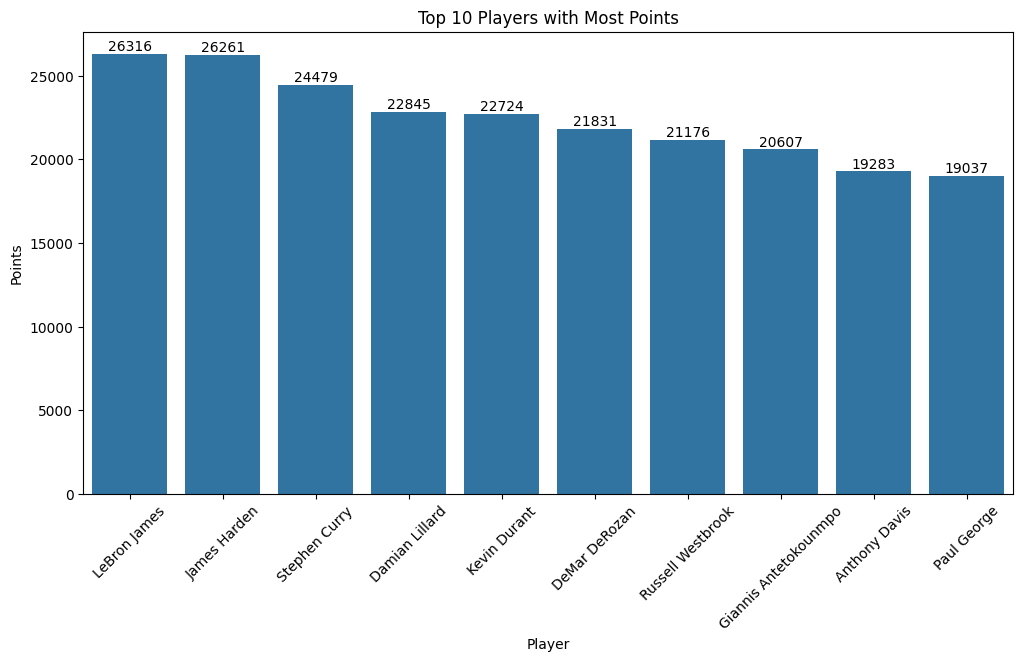

In [11]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=top10pointer.index, y=top10pointer["PTS"])
plt.xlabel("Player")
plt.ylabel("Points")
plt.title("Top 10 Players with Most Points")
#İsimlerin çakışmaması için 45derece döndürüyoruz.
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)


In [12]:
most_assist = df.groupby("PLAYER")["AST"].sum().sort_values(ascending=False).head(10)
most_assist

,AST
PLAYER,
Chris Paul,8013
Russell Westbrook,8009
James Harden,8008
LeBron James,7553
Damian Lillard,6059
Stephen Curry,5989
Kyle Lowry,5983
Jrue Holiday,5570
Draymond Green,5539


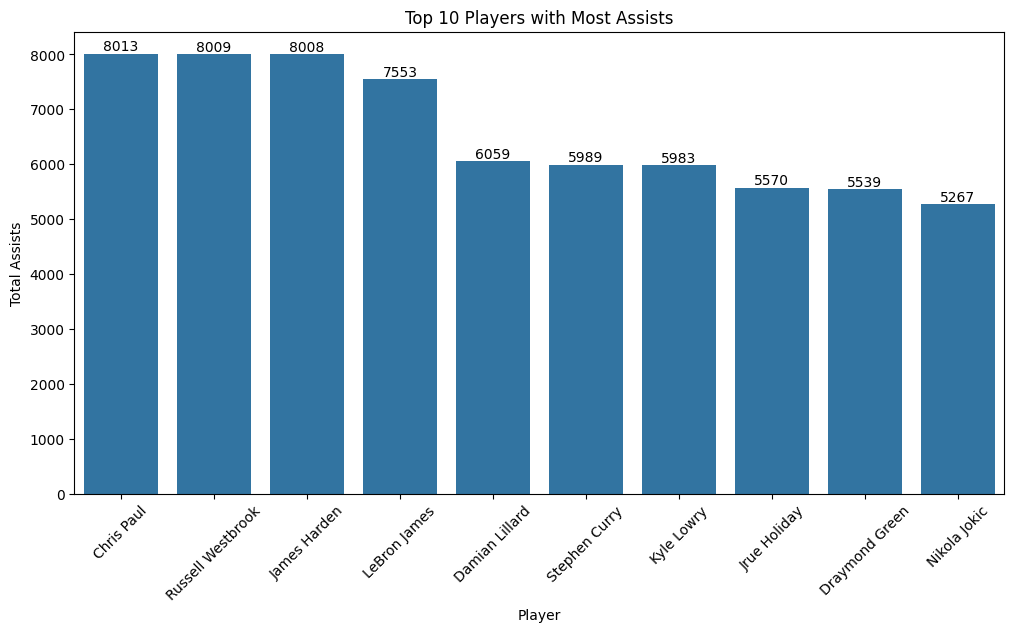

In [13]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = most_assist.index, y = most_assist.values)
plt.xlabel("Player")
plt.ylabel("Total Assists")
plt.title("Top 10 Players with Most Assists")

plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

In [ ]:
players_list = top10pointer.index

In [14]:
po = df[df["Season_type"] == "Playoffs"]
po_pts = po.groupby("TEAM")[["PTS"]].sum().sort_values(by="PTS", ascending=False).head(5)

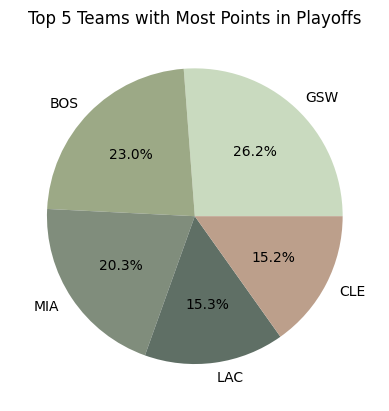

In [15]:
most_pts_teams = po_pts.values.flatten()
labels = po_pts.index
colors = ['#C9DABF','#9CA986','#808D7C','#5F6F65','#BC9F8B']

plt.pie(most_pts_teams, labels = labels, colors = colors, autopct='%1.1f%%')
plt.title("Top 5 Teams with Most Points in Playoffs")
plt.show()

In [34]:
most_pers_foul = df.groupby("PLAYER")["PF"].sum().sort_values(ascending = False).head(8)
most_pers_foul

,PF
PLAYER,
Draymond Green,2910
Kyle Lowry,2659
Giannis Antetokounmpo,2635
Jonas Valanciunas,2594
Andre Drummond,2554
James Harden,2505
Russell Westbrook,2452
P.J. Tucker,2448


In [24]:
dra_green_fouls = df[df["PLAYER"] == "Draymond Green"]
dra_green_fouls = dra_green_fouls.groupby("year").sum()
dra_green_fouls

,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
year,,,,,,,,,,,,,,,,,,,,,
2012-13,Regular%20SeasonPlayoffs,406220,379,Draymond GreenDraymond Green,3221225488,GSWGSW,91,1284,108,313,...,311,72,48,35,63,194,297,481,2.62,1.32
2013-14,Regular%20SeasonPlayoffs,406220,271,Draymond GreenDraymond Green,3221225488,GSWGSW,89,2025,215,519,...,467,172,114,84,108,264,594,973,2.85,1.83
2014-15,Regular%20SeasonPlayoffs,406220,93,Draymond GreenDraymond Green,3221225488,GSWGSW,100,3274,439,1005,...,859,400,161,124,191,342,1209,1905,4.07,1.59
2015-16,Regular%20SeasonPlayoffs,406220,58,Draymond GreenDraymond Green,3221225488,GSWGSW,104,3687,520,1095,...,997,736,156,154,315,321,1486,2511,4.77,1.12
2016-17,Regular%20SeasonPlayoffs,406220,139,Draymond GreenDraymond Green,3221225488,GSWGSW,93,3064,344,811,...,754,643,185,134,220,277,998,1944,5.96,1.70
2017-18,Regular%20SeasonPlayoffs,406220,153,Draymond GreenDraymond Green,3221225488,GSWGSW,91,3106,364,811,...,757,679,136,122,265,260,999,1932,5.23,1.12
2018-19,Regular%20SeasonPlayoffs,406220,241,Draymond GreenDraymond Green,3221225488,GSWGSW,88,2915,302,651,...,704,641,127,103,252,282,778,1704,4.94,0.95
2019-20,Regular%20Season,203110,261,Draymond Green,1610612744,GSW,43,1222,123,316,...,266,266,59,33,98,110,345,658,2.71,0.60
2020-21,Regular%20Season,203110,213,Draymond Green,1610612744,GSW,63,1982,170,380,...,448,558,105,52,188,194,444,1191,2.97,0.56


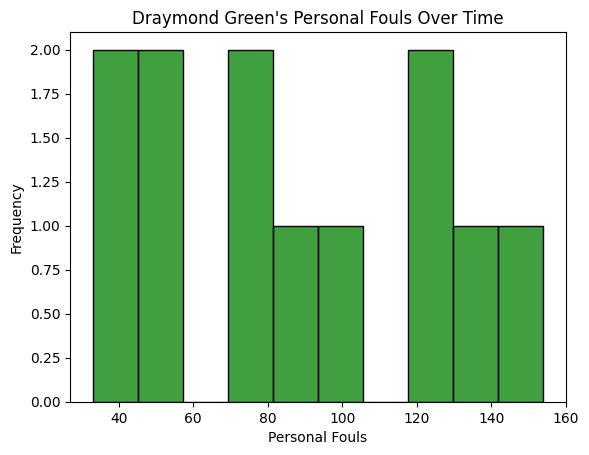

In [18]:
sns.histplot(data = dra_green_fouls, x = "BLK" , bins = 10 , color = "g")
plt.xlabel("Personal Fouls")
plt.ylabel("Frequency")
plt.title("Draymond Green's Personal Fouls Over Time")
plt.show()

In [28]:
alperensengun = df[df["PLAYER"] == "Alperen Sengun"]
alperensengun

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
6619,2021-22,Regular%20Season,1630578,149,Alperen Sengun,1610612745,HOU,72,1489,249,...,393,185,59,68,145,214,692,909,1.28,0.41
7376,2022-23,Regular%20Season,1630578,83,Alperen Sengun,1610612745,HOU,75,2171,442,...,678,291,70,70,193,258,1109,1586,1.51,0.36
8100,2023-24,Regular%20Season,1630578,52,Alperen Sengun,1610612745,HOU,63,2046,527,...,589,312,76,46,162,211,1331,1629,1.93,0.47


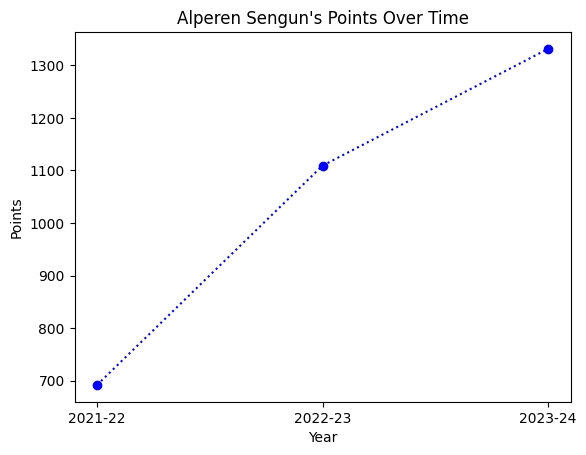

In [32]:
points = alperensengun["PTS"]
year = alperensengun["year"]

plt.plot(year, points, marker = "o", linestyle = ":", color = "b")
plt.xlabel("Year")
plt.ylabel("Points")
plt.title("Alperen Sengun's Points Over Time")
plt.show()

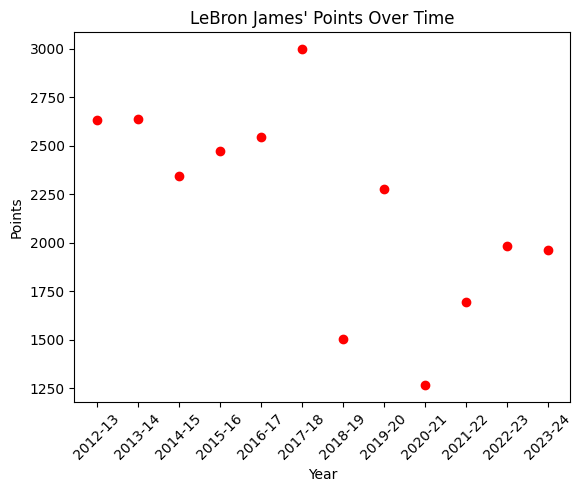

In [47]:
lebron = df[df["PLAYER"] == "LeBron James"]
lebron = lebron.groupby("year").sum()

lebronpts = lebron["PTS"].values
year = lebron.index

plt.scatter(year, lebronpts, marker = "o", color = "r")
plt.xlabel("Year")
plt.ylabel("Points")
plt.title("LeBron James' Points Over Time")
plt.xticks(rotation = 45)
plt.show()

In [85]:
"""
year2023 = year2023.groupby("PLAYER").sum()
year2023
"""
year2023 = df[df["year"] == "2023-24"]
po = year2023[year2023["Season_type"] == "Playoffs"]
po_copy = po.copy()
po = po[:20]
po

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
8621,2023-24,Playoffs,1629029,1,Luka Doncic,1610612742,DAL,22,899,225,...,208,178,41,8,90,56,635,665,1.98,0.46
8622,2023-24,Playoffs,202681,2,Kyrie Irving,1610612742,DAL,22,879,186,...,81,113,23,7,51,62,487,437,2.22,0.45
8623,2023-24,Playoffs,1628369,3,Jayson Tatum,1610612738,BOS,19,768,159,...,184,119,20,13,50,54,475,529,2.38,0.40
8624,2023-24,Playoffs,1627759,4,Jaylen Brown,1610612738,BOS,19,707,175,...,113,62,23,12,51,51,454,414,1.22,0.45
8625,2023-24,Playoffs,1630162,5,Anthony Edwards,1610612750,MIN,16,649,156,...,112,104,24,9,52,37,441,451,2.00,0.46
8626,2023-24,Playoffs,1628973,6,Jalen Brunson,1610612752,NYK,13,518,151,...,43,97,10,2,35,26,421,322,2.77,0.29
8627,2023-24,Playoffs,1627783,7,Pascal Siakam,1610612754,IND,17,602,157,...,128,64,13,7,19,48,367,403,3.37,0.68
8628,2023-24,Playoffs,203999,8,Nikola Jokic,1610612743,DEN,12,482,133,...,161,104,17,8,40,32,344,476,2.60,0.42
8629,2023-24,Playoffs,1628401,9,Derrick White,1610612738,BOS,19,676,109,...,81,77,18,23,16,44,318,366,4.81,1.13
8630,2023-24,Playoffs,1626157,10,Karl-Anthony Towns,1610612750,MIN,16,522,108,...,144,42,12,3,27,55,305,345,1.56,0.44


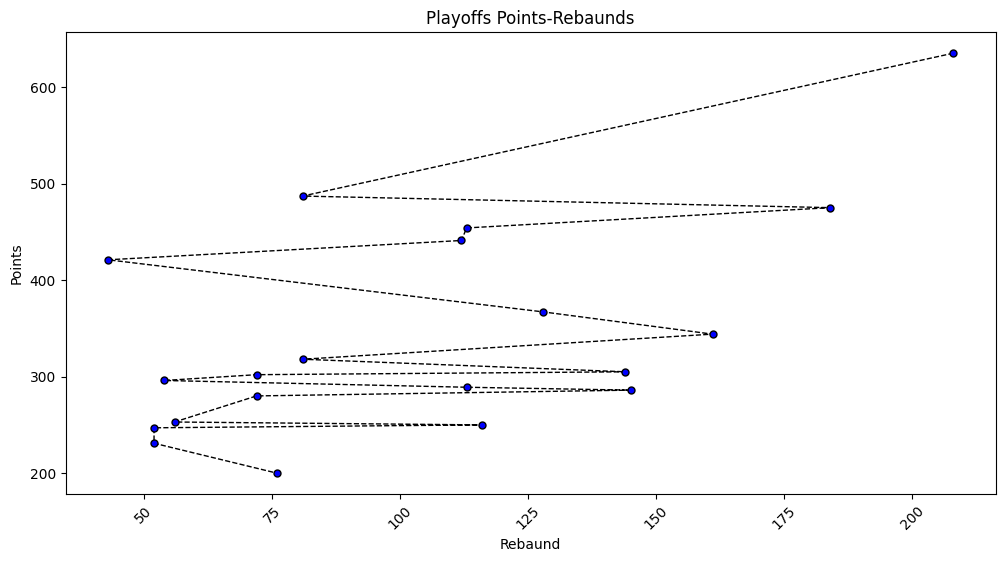

In [77]:
x = po["REB"]
y = po["PTS"]
plt.figure(figsize = (12,6))
plt.plot(x, y, color = "black", linestyle = "--", linewidth = 1, marker = "o",
         markersize = 5, mfc = 'blue' )
plt.xlabel("Rebaund")
plt.ylabel("Points")
plt.title("Playoffs Points-Rebaunds")
plt.xticks(rotation = 45)
plt.show()

Playoff en iyi 20 oyuncudan 500 sayı, 150 rebaund sınırını geçen yalnızca 1 oyuncu var. (Luka Doncic - 635 PTS, 208 REB)

In [82]:
#400 sayı - 100 rebaundu aşan oyuncular
po400p100r = po[po["PTS"] >= 400]
po400p100r = po[po["REB"] >= 100]
po400p100r

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
8621,2023-24,Playoffs,1629029,1,Luka Doncic,1610612742,DAL,22,899,225,...,208,178,41,8,90,56,635,665,1.98,0.46
8623,2023-24,Playoffs,1628369,3,Jayson Tatum,1610612738,BOS,19,768,159,...,184,119,20,13,50,54,475,529,2.38,0.40
8624,2023-24,Playoffs,1627759,4,Jaylen Brown,1610612738,BOS,19,707,175,...,113,62,23,12,51,51,454,414,1.22,0.45
8625,2023-24,Playoffs,1630162,5,Anthony Edwards,1610612750,MIN,16,649,156,...,112,104,24,9,52,37,441,451,2.00,0.46


In [101]:
#Takımların 100 sayı, 50 rebaundu geçen oyuncularının sayısı
po100p50r = po_copy[po_copy["PTS"] >= 100]
po100p50r = po[po["REB"] >= 50]
po100p50r.head()

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
8621,2023-24,Playoffs,1629029,1,Luka Doncic,1610612742,DAL,22,899,225,...,208,178,41,8,90,56,635,665,1.98,0.46
8622,2023-24,Playoffs,202681,2,Kyrie Irving,1610612742,DAL,22,879,186,...,81,113,23,7,51,62,487,437,2.22,0.45
8623,2023-24,Playoffs,1628369,3,Jayson Tatum,1610612738,BOS,19,768,159,...,184,119,20,13,50,54,475,529,2.38,0.40
8624,2023-24,Playoffs,1627759,4,Jaylen Brown,1610612738,BOS,19,707,175,...,113,62,23,12,51,51,454,414,1.22,0.45
8625,2023-24,Playoffs,1630162,5,Anthony Edwards,1610612750,MIN,16,649,156,...,112,104,24,9,52,37,441,451,2.00,0.46


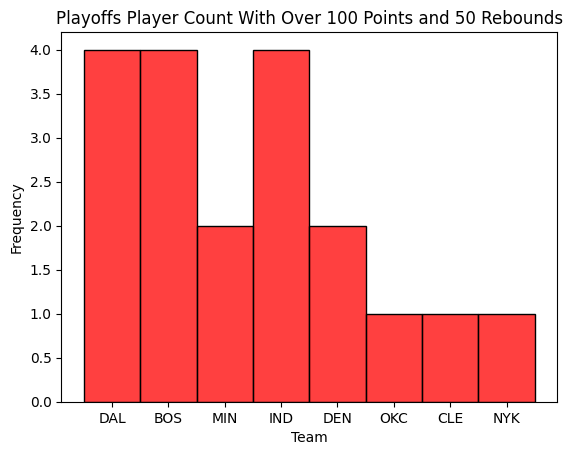

In [90]:
sns.histplot(data = po100p50r, x = "TEAM", bins = 10, color = 'r')
plt.xlabel("Team")
plt.ylabel("Frequency")
plt.title("Playoffs Player Count With Over 100 Points and 50 Rebounds")
plt.show()